<a href="https://colab.research.google.com/github/PATANKHAMRUDDIN/minor_project/blob/main/minor_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks**

In [1]:
import torch
from torch import nn
torch.__version__

'2.8.0+cu126'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!pip install split-folders
from pathlib import Path
import splitfolders


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/kidney_disease_nn/kidney-dataset.zip"
extract_to = "/content/data/CT-KIDNEY-DATASET"  # Extract into Colab's local file system

# Create the folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [ ]:
import zipfile
import os

# Path to the zip file in your Google Drive
zip_path = "/content/drive/MyDrive/kidney_disease_nn/kidney-dataset.zip"
extract_path = "/content/data/CT-KIDNEY-DATASET"  # Where you want to extract it

# Only unzip if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Extracted to {extract_path}")
else:
    print(f"📂 Already extracted at {extract_path}")


📂 Already extracted at /content/data/CT-KIDNEY-DATASET


In [ ]:
from pathlib import Path
import splitfolders
input_folder = Path("/content/data/CT-KIDNEY-DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone")

output_folder = Path("/content/data/CT-KIDNEY")

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))


Copying files: 12446 files [00:14, 833.03 files/s]


In [ ]:
import os

extracted_path = "/content/data/CT-KIDNEY-DATASET"

for root, dirs, files in os.walk(extracted_path):
    print(f"📁 Folder: {root}")
    print(f"📂 Subfolders: {dirs}")
    print(f"🖼️ Files: {files[:5]}")  # only show first 5 files to avoid overload
    print("-" * 40)


📁 Folder: /content/data/CT-KIDNEY-DATASET
📂 Subfolders: ['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']
🖼️ Files: ['kidneyData.csv']
----------------------------------------
📁 Folder: /content/data/CT-KIDNEY-DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone
📂 Subfolders: ['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']
🖼️ Files: []
----------------------------------------
📁 Folder: /content/data/CT-KIDNEY-DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone
📂 Subfolders: ['Normal', 'Stone', 'Tumor', 'Cyst']
🖼️ Files: []
----------------------------------------
📁 Folder: /content/data/CT-KIDNEY-DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal
📂 Subfolders: []
🖼️ Files: ['Normal- (1987).jpg', 'Normal- (4363).jpg', 'Normal- (4205).jpg', 'Normal- (2438).jpg', 'Normal- (1250).jpg']
----------------------------------------
📁 Folder: /content/data/CT-KIDNEY-DATASET/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-

In [ ]:
import os

# Walk through the 'CT-KIDNEY' directory
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")
        for dirname in dirnames:
            print(f"  Subdirectory: {dirname}")
        for filename in filenames:
            print(f"  File: {filename}")

# Set the path to the split dataset
image_path = "/content/data/CT-KIDNEY"  # Update this path if necessary
walk_through_dir(image_path)


There are 3 directories and 0 files in '/content/data/CT-KIDNEY'.
  Subdirectory: train
  Subdirectory: val
  Subdirectory: test
There are 4 directories and 0 files in '/content/data/CT-KIDNEY/train'.
  Subdirectory: Normal
  Subdirectory: Stone
  Subdirectory: Tumor
  Subdirectory: Cyst
There are 0 directories and 4061 files in '/content/data/CT-KIDNEY/train/Normal'.
  File: Normal- (1987).jpg
  File: Normal- (4205).jpg
  File: Normal- (2438).jpg
  File: Normal- (1250).jpg
  File: Normal- (2930).jpg
  File: Normal- (4991).jpg
  File: Normal- (3760).jpg
  File: Normal- (746).jpg
  File: Normal- (4328).jpg
  File: Normal- (1408).jpg
  File: Normal- (3895).jpg
  File: Normal- (4560).jpg
  File: Normal- (3986).jpg
  File: Normal- (3146).jpg
  File: Normal- (2814).jpg
  File: Normal- (1723).jpg
  File: Normal- (260).jpg
  File: Normal- (2518).jpg
  File: Normal- (1516).jpg
  File: Normal- (3065).jpg
  File: Normal- (752).jpg
  File: Normal- (2176).jpg
  File: Normal- (4885).jpg
  File: Nor

In [ ]:
import os
# Check the directory structure to ensure everything is in place
image_path = "/content/data/CT-KIDNEY"  # Directory where images should be located
# List the contents of the main folder
print("Contents of CT-KIDNEY directory:")
print(os.listdir(image_path))
# Check if the 'train', 'val', and 'test' folders exist and print their contents
print("\nContents of train directory:")
print(os.listdir(image_path + "/train"))
print("\nContents of test directory:")
print(os.listdir(image_path + "/test"))
print("\nContents of validation directory:")
print(os.listdir(image_path + "/val"))

Contents of CT-KIDNEY directory:
['train', 'val', 'test']

Contents of train directory:
['Normal', 'Stone', 'Tumor', 'Cyst']

Contents of test directory:
['Normal', 'Stone', 'Tumor', 'Cyst']

Contents of validation directory:
['Normal', 'Stone', 'Tumor', 'Cyst']


In [ ]:
from pathlib import Path
import random
from PIL import Image

# Set the seed for reproducibility
random.seed(42)

# Ensure the path is correctly specified
image_path = Path("/content/data/CT-KIDNEY")

# Get all image files in train, val, and test folders (with any extension)
image_path_list = list(image_path.glob("**/*.*"))  # Match any file extension

# Check if images are found
if len(image_path_list) == 0:
    print("No images found! Please check your dataset or path.")
else:
    print(f"Found {len(image_path_list)} images.")
    print("First few image paths:")
    for i in range(min(5, len(image_path_list))):  # Print first 5 image paths
        print(image_path_list[i])

    # Pick a random image
    random_image_path = random.choice(image_path_list)
    print(f"Random image path: {random_image_path}")

    # Get the image class from the parent directory
    image_class = random_image_path.parent.stem
    print(f"Image class: {image_class}")

    # Open and display the image
    img = Image.open(random_image_path)
    print(f"Image height: {img.height}")
    print(f"Image width: {img.width}")
    img.show()


Found 12446 images.
First few image paths:
/content/data/CT-KIDNEY/train/Normal/Normal- (1987).jpg
/content/data/CT-KIDNEY/train/Normal/Normal- (4205).jpg
/content/data/CT-KIDNEY/train/Normal/Normal- (2438).jpg
/content/data/CT-KIDNEY/train/Normal/Normal- (1250).jpg
/content/data/CT-KIDNEY/train/Normal/Normal- (2930).jpg
Random image path: /content/data/CT-KIDNEY/val/Stone/Stone- (731).jpg
Image class: Stone
Image height: 512
Image width: 512


In [ ]:
image_path = Path("/content/data/CT-KIDNEY")
train_dir = image_path / "train"
test_dir = image_path / "test"
val_dir = image_path / "val"


In [ ]:
print(train_dir)

/content/data/CT-KIDNEY/train


In [ ]:
import os
print(os.listdir(train_dir))  # Should print ['Normal', 'Tumor', 'Cyst', 'Stone']


['Normal', 'Stone', 'Tumor', 'Cyst']


/content/data/CT-KIDNEY/val/Stone/Stone- (731).jpg
Stone
Random image path: /content/data/CT-KIDNEY/val/Stone/Stone- (731).jpg
Image class: Stone
Image height: 512
Image width: 512


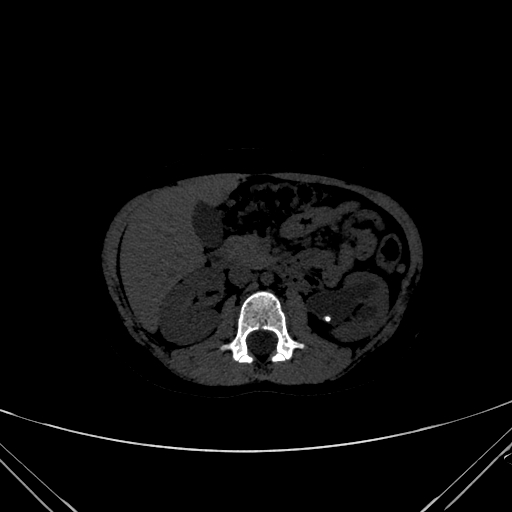

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42)
# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# 2. Pick a random image
random_image_path = random.choice(image_path_list)
print(random_image_path)
# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)
# 4. Open the image
img = Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

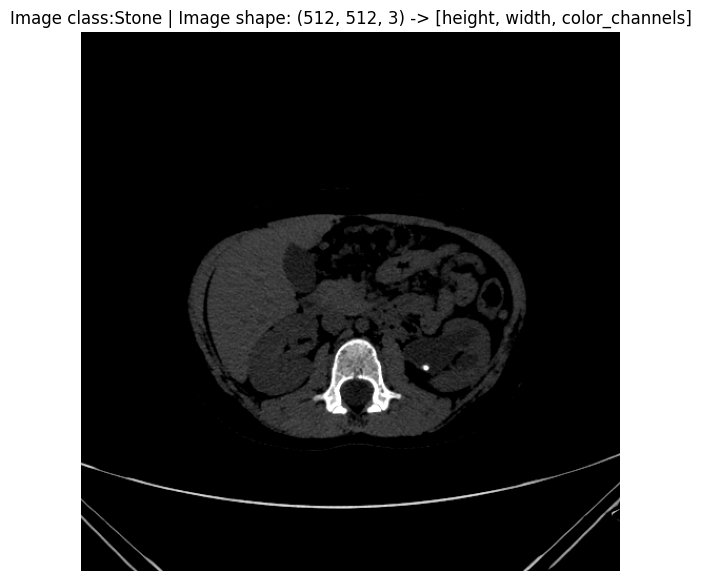

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Turn the image to an array
img_as_array = np.asarray(img)
# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
from torchvision import datasets
# Turn image folders into Datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)
val_data = datasets.ImageFolder(root=val_dir,
                                transform=transform)
train_data, test_data, val_data

(Dataset ImageFolder
     Number of datapoints: 9955
     Root location: /content/data/CT-KIDNEY/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset ImageFolder
     Number of datapoints: 1249
     Root location: /content/data/CT-KIDNEY/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset ImageFolder
     Number of datapoints: 1242
     Root location: /content/data/CT-KIDNEY/val
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['Cyst', 'Normal', 'Stone', 'Tumor']

In [ ]:
# Get class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3}

In [ ]:
# Check len of our dataset
len(train_data), len(test_data), len(val_data)

(9955, 1249, 1242)

In [ ]:
# Index on train_data dataset to get a sample image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Image datatype: {img.dtype}")

Image tensor:
tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]])
Image shape: torch.Size([3, 64, 64])
Image label: 0
Image datatype: torch.float32


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Cyst')

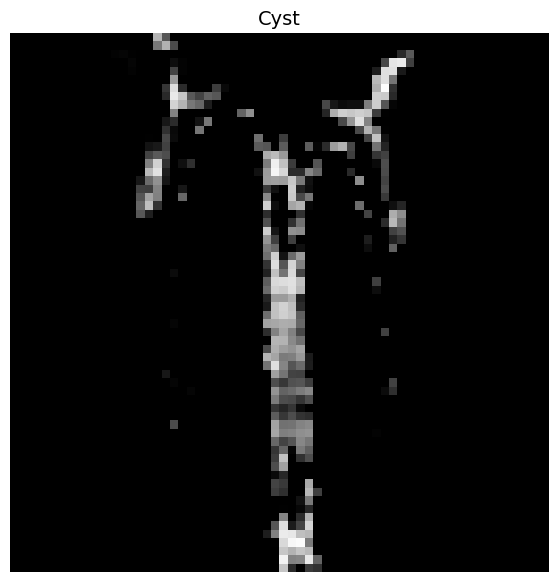

In [ ]:
# Rearrange the order dimension
img_permute = img.permute(1,2,0)
# Print the different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")
# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
val_dataloader = DataLoader(dataset=val_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader, val_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a36f353e210>,
 <torch.utils.data.dataloader.DataLoader at 0x7a35de16f3d0>)

In [ ]:
import torch.nn.functional as F

class CNNModel0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.flatten= nn.Flatten()
        self.fc1 = nn.Linear(in_features=hidden_units*13*13,out_features=hidden_units)
        self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape


(torch.Size([8, 3, 64, 64]), torch.Size([8]))

In [ ]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Create an instance of CNNModel
model_0 = CNNModel0(input_shape=3,
                    hidden_units=20,
                    output_shape=len(train_data.classes)).to(device)
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 0.2032,  0.0917, -0.0594, -0.0243],
        [ 0.1807,  0.1208, -0.0288, -0.0142],
        [ 0.1772,  0.1166, -0.0507, -0.0106],
        [ 0.2099,  0.1039, -0.0526, -0.0264],
        [ 0.1826,  0.1201, -0.0507, -0.0047],
        [ 0.1930,  0.0997, -0.0610, -0.0160],
        [ 0.1764,  0.1109, -0.0493, -0.0073],
        [ 0.1909,  0.1147, -0.0467, -0.0009]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
!pip install torchinfo


In [ ]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
CNNModel0                                [1, 4]                    --
├─Sequential: 1-1                        [1, 20, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 20, 62, 62]           560
│    └─ReLU: 2-2                         [1, 20, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 20, 60, 60]           3,620
│    └─ReLU: 2-4                         [1, 20, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 20, 30, 30]           --
├─Sequential: 1-2                        [1, 20, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 20, 28, 28]           3,620
│    └─ReLU: 2-7                         [1, 20, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 20, 26, 26]           3,620
│    └─ReLU: 2-9                         [1, 20, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 20, 13, 13]           --
├─Fla

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=1e-3)

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0_results = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
}

EPOCHS = 10
# Start the time
from timeit import default_timer as timer
start_timer = timer()
# Model training begins
for epoch in tqdm(range(EPOCHS)):
    # Training loop
    model_0.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)
    model_0_results["train_loss"].append(train_loss)
    model_0_results["train_acc"].append(train_acc)
    ## Validation loop
    model_0.eval()
    val_loss, val_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(val_dataloader):
            X, y = X.to(device), y.to(device)
            val_pred_logits = model_0(X)
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += (val_pred_labels==y).sum().item()/len(val_pred_labels)
    val_loss = val_loss / len(val_dataloader)
    val_acc = val_acc / len(val_dataloader)
    model_0_results["val_loss"].append(val_loss)
    model_0_results["val_acc"].append(val_acc)
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f} | validation loss: {val_loss:.4f}, validation acc: {val_acc:.4f}")
end_timer = timer()
print(f"Total training timer: {end_timer-start_timer:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.8051, Train acc: 0.6689 | validation loss: 0.3771, validation acc: 0.8526
Epoch: 1 | Train loss: 0.5139, Train acc: 0.7644 | validation loss: 0.2297, validation acc: 0.8942
Epoch: 2 | Train loss: 0.4495, Train acc: 0.7816 | validation loss: 0.1522, validation acc: 0.9183
Epoch: 3 | Train loss: 0.4114, Train acc: 0.7927 | validation loss: 0.1131, validation acc: 0.9623
Epoch: 4 | Train loss: 0.3540, Train acc: 0.8243 | validation loss: 0.2122, validation acc: 0.9014
Epoch: 5 | Train loss: 0.3161, Train acc: 0.8491 | validation loss: 0.0825, validation acc: 0.9776
Epoch: 6 | Train loss: 0.2937, Train acc: 0.8627 | validation loss: 0.0657, validation acc: 0.9872
Epoch: 7 | Train loss: 0.2690, Train acc: 0.8758 | validation loss: 0.0712, validation acc: 0.9904
Epoch: 8 | Train loss: 0.2693, Train acc: 0.8788 | validation loss: 0.0489, validation acc: 0.9936
Epoch: 9 | Train loss: 0.2671, Train acc: 0.8807 | validation loss: 0.0455, validation acc: 0.9872
Total trai

In [ ]:
from typing import Tuple, Dict, List

def plot_loss_curve(results: Dict[str, List[float]]):
    # Get the loss values of results dictionary
    loss = results["train_loss"]
    val_loss = results["val_loss"]
    # Get the accuracy values of the results dictionary
    accuracy = results["train_acc"]
    val_accuracy = results["val_acc"]
    # Find number of epochs
    epochs = range(len(results["train_loss"]))
    # Setup a plot
    plt.figure(figsize=(15,7))
    # Plot the loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    # Plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, val_accuracy, label="val_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

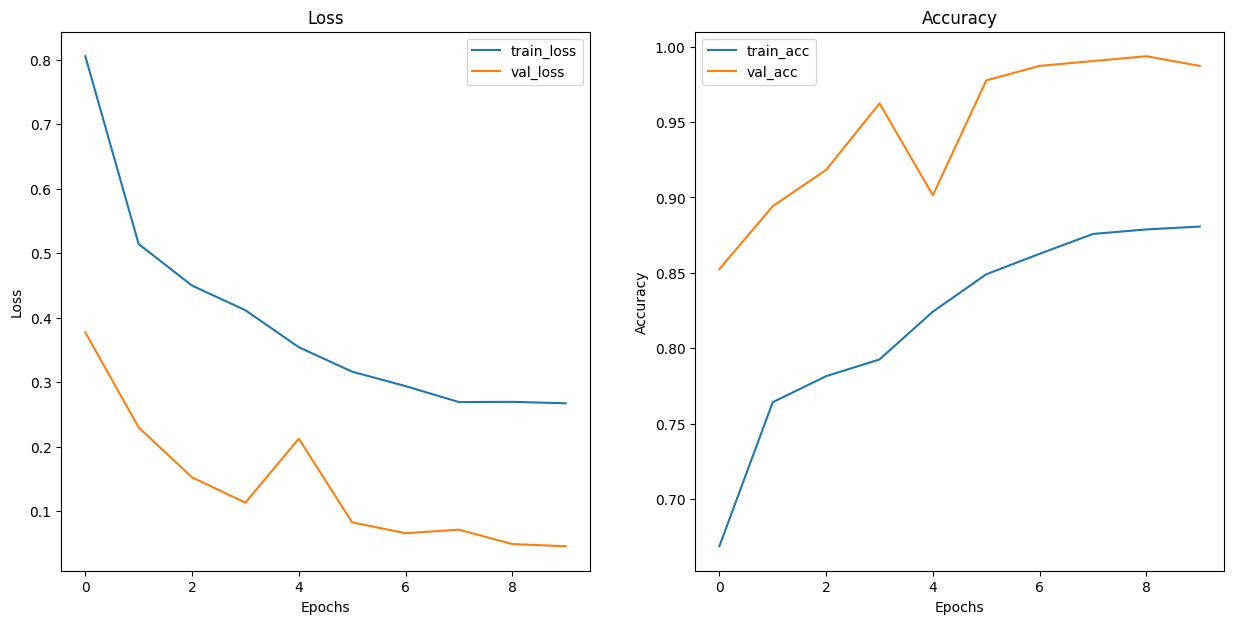

In [ ]:
plot_loss_curve(model_0_results)

Test accuracy: 98.80%


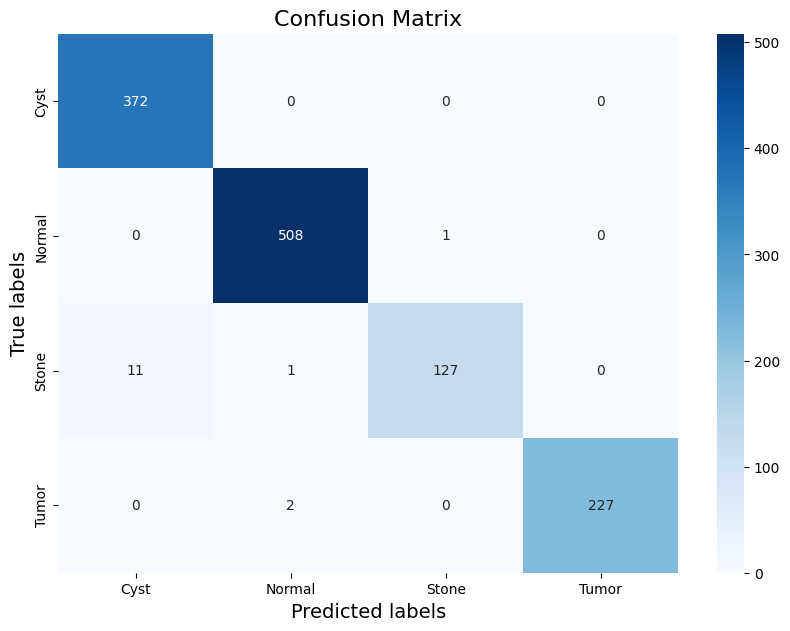

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

all_preds = []
all_labels = []
correct = 0
total = 0

model_0.eval()
with torch.inference_mode():
    for images,labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_0(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracy = 100 * correct / total
print(f'Test accuracy: {test_accuracy:.2f}%')
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
y_true = []
y_probs = []
model_0.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        preds = torch.softmax(model_0(X), dim=1)
        y_true.append(y.cpu().numpy())
        y_probs.append(preds.cpu().numpy())
y_true = np.concatenate(y_true)
y_probs = np.concatenate(y_probs)

In [ ]:
num_classes = len(train_data.classes)
auc_scores = []
for i in range(num_classes):
    auc = roc_auc_score((y_true == i).astype(int), y_probs[:,i])
    auc_scores.append(auc)
    print(f"class {i} AUC: {auc:.4f}")

class 0 AUC: 1.0000
class 1 AUC: 1.0000
class 2 AUC: 0.9997
class 3 AUC: 1.0000


Plot ROC curves for each class

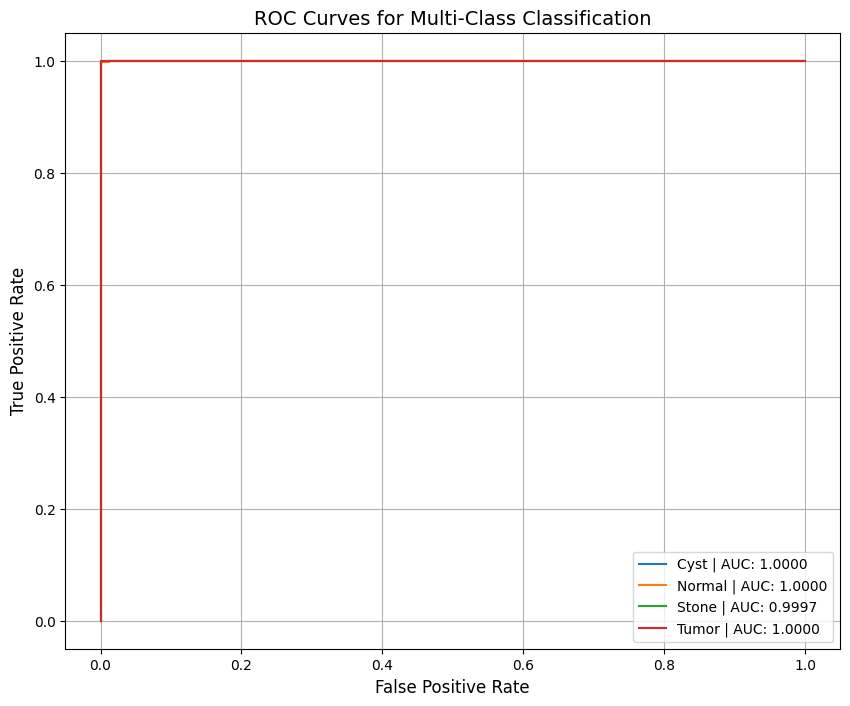

In [ ]:
plt.figure(figsize=(10,8))
for i in range(num_classes):
    fpr, tpr, thresholds = roc_curve((y_true == i).astype(int), y_probs[:,i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} | AUC: {auc_scores[i]:.4f}")
plt.title("ROC Curves for Multi-Class Classification", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
macro_auc = roc_auc_score(y_true, y_probs, multi_class="ovr", average="macro")
print(f'Macro-Average AUC: {macro_auc:.4f}')

Macro-Average AUC: 0.9999


In [ ]:
def save_model(model:torch.nn.Module,
               target_dir:str,
               model_name:str):
    #create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True, exist_ok=True)
    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "Model name must have a .pth ot .pt file extension"
    model_save_path = target_dir_path / model_name
    # Save the model state_dict()
    print(f"[INFO] Saving model to {model_save_path}...")
    torch.save(obj=model.state_dict(), f=model_save_path)

In [ ]:
save_model(model_0, 'models',"model_0.pth")

[INFO] Saving model to models/model_0.pth...
